#Background
Belakangan ini telah banyak kita saksikan kejadin bencana alam yang besar dan memakan banyak korban, seringkali kita masih memandang hal itu berlangsung karena proses alam dan konsekuensinya yang hanya dapat kita terima. Namun, seiring dengan naiknya angka deforestasi, limbah perusahaan yang mencemari lingkungan sekitar, berton-ton sampah yang melantur di lautan apakah tidak pernah berdampak pada keseimbangan alam ?.

Permasalahan yang disebabkan oleh manusia ini masih belum dianggap serius oleh kita bersama dalam kontribusinya mengganggu keseimbangan alam. Pakistan, negara muslim terdpadat kedua di dunia ini baru saja dilada banjir besar yang menenggelamkan hampir setengah dari wilayahnya. Bencana alam ini disusul dengan krisis pasokan pangan dan saat ini dihadapi dengan ancaman krisis ekonomi serta politik.  

Dilihat dari struktur demografi, Pakistan memiliki median usia penduduk di angka 23 tahun. Menurut para ahli, negara ini diperkirakan mendapat bonus demografi. Dengan kesamaan pola seperti Negara Indonesia, analisis ini perlu dilakukan agar pemerintah sebagai pembuat kebijakan dapat lebih siap menghadapi bonus demografi.

#Objective
*   **Analisis Faktor Pengaruh** Mengembangkan pendekatan analisis data yang efektif untuk mengindentifikasi indikator kependudukan yang dapat memengaruhi luasan wilayah yang terdampak bencana abrasi.
*   **Hubungan Antar Faktor** Melihat bagaimana kaitan antara faktor yang memengaruhi luasan wilayah terdampak bencana abrasi.
*    **Pengelompokan Wilayah** Melakukan pengelompokan wilayah berdasarkan pola demografi yang berdampak pada luasan wilayah terdampak bencana abrasi.

#Data Understanding

Pada project ini data yang digunakan bersumber dari Badan Penanggulangan Bencana Daerah Kabupaten Sambas. Dataset ini mencakup:
1. Data luasan daerah yang terdampak abrasi berdasarkan kelas kerusakannya
2. Total data luasan daerah yang terdampak abrasi
3. Data demografi wilayah yang terdampak abrasi

Berikut adalah tabel dengan nama atribut dan deskripsinya:

| Nama Atribut                        | Deskripsi                                                                                   |
|-------------------------------------|---------------------------------------------------------------------------------------------|
| ID Desa                             | Kode unik yang mengidentifikasi desa                                                        |
| Desa                                | Nama desa                                                                                   |
| Kecamatan                           | Kecamatan tempat desa berada                                                                |
| Rendah                              | Luasan daerah terdampak dengan kerusakan rendah (dalam hektar)                              |
| Sedang                              | Luasan daerah terdampak dengan kerusakan sedang (dalam hektar)                              |
| Tinggi                              | Luasan daerah terdampak dengan kerusakan tinggi (dalam hektar)                              |
| Total Luas (Ha)                     | Total luas daerah yang terdampak (dalam hektar)                                             |
| Kelas                               | Kategori kerusakan secara keseluruhan                                                      |
| Jarak ke Ibu Kota Kabupaten (km)    | Jarak desa ke ibu kota kabupaten (dalam kilometer)                                          |
| Jumlah Penduduk                     | Jumlah penduduk di desa tersebut                                                            |
| Kepadatan Penduduk (jiwa/km²)       | Kepadatan penduduk di desa tersebut (dalam jiwa per kilometer persegi)                      |
| Usia Lansia (60 ke atas)            | Jumlah penduduk berusia 60 tahun ke atas di desa tersebut                                   |
| Usia Anak (0-14 tahun)              | Jumlah penduduk berusia 0-14 tahun di desa tersebut                                         |
| Ibu Hamil                           | Jumlah ibu hamil di desa tersebut                                                           |
| Tingkat Pendidikan (SMA/sederajat)  | Jumlah penduduk dengan tingkat pendidikan setara SMA di desa tersebut                       |

# Import Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('GelombangAbrasi - a22.csv')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb

# Data Loading

In [111]:
data.head()

,ID Desa,Desa,Kecamatan,Rendah,Sedang,Tinggi,Kelas,Luas Wilayah (Km2),Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Penduduk Terpapar
0,6101032001,Sarang Burung Danau,Jawai,0.00,3.61,55.31,Tinggi,48.20,62,5862,122.0,2869,424,1655,104.0,374,266
1,6101032002,Sungai Nilam,Jawai,0.00,11.00,1.29,Sedang,18.05,57,2407,133.0,1184,172,636,44.0,147,0
2,6101032003,Sarang Burung Kolam,Jawai,0.08,3.67,0.00,Sedang,13.25,58,3404,257.0,1663,331,827,65.0,258,0
3,6101032004,Sarang Burung Usrat,Jawai,0.00,0.06,1.66,Tinggi,14.35,54,4061,283.0,1964,329,1117,74.0,308,0
4,6101032005,Sarang Burung Kuala,Jawai,0.00,0.73,0.00,Sedang,10.85,52,3062,282.0,1496,246,830,57.0,224,0


In [112]:
data['Total Luas'] = data['Rendah'] + data['Sedang'] + data['Tinggi']

In [113]:
data = data.drop(['ID Desa','Kecamatan', 'Rendah','Sedang','Tinggi'], axis=1)

In [114]:
data.shape

(32, 13)

In [115]:
data.isnull().sum()

Desa                                  0
Kelas                                 0
Luas Wilayah (Km2)                    0
Jarak ke Ibu Kota Kabupaten (km)      0
Jumlah Penduduk                       0
Kepadatan Penduduk                    0
Perempuan                             0
Usia Lansia (60 ke atas)              0
Usia Anak (0-14 tahun)                0
Ibu Hamil                             2
Tingkat Pendidikan (SMA/sederajat)    0
Penduduk Terpapar                     0
Total Luas                            0
dtype: int64

In [116]:
#menghilangkan missing value
mean_value = data['Ibu Hamil'].mean()
data['Ibu Hamil'] = data['Ibu Hamil'].fillna(mean_value)

In [117]:
data.isna().sum()

Desa                                  0
Kelas                                 0
Luas Wilayah (Km2)                    0
Jarak ke Ibu Kota Kabupaten (km)      0
Jumlah Penduduk                       0
Kepadatan Penduduk                    0
Perempuan                             0
Usia Lansia (60 ke atas)              0
Usia Anak (0-14 tahun)                0
Ibu Hamil                             0
Tingkat Pendidikan (SMA/sederajat)    0
Penduduk Terpapar                     0
Total Luas                            0
dtype: int64

In [118]:
data.duplicated().sum()

0

# Exploratory Data Analysis

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Desa                                32 non-null     object 
 1   Kelas                               32 non-null     object 
 2   Luas Wilayah (Km2)                  32 non-null     float64
 3   Jarak ke Ibu Kota Kabupaten (km)    32 non-null     int64  
 4   Jumlah Penduduk                     32 non-null     int64  
 5   Kepadatan Penduduk                  32 non-null     float64
 6   Perempuan                           32 non-null     int64  
 7   Usia Lansia (60 ke atas)            32 non-null     int64  
 8   Usia Anak (0-14 tahun)              32 non-null     int64  
 9   Ibu Hamil                           32 non-null     float64
 10  Tingkat Pendidikan (SMA/sederajat)  32 non-null     int64  
 11  Penduduk Terpapar                   32 non-null

In [120]:
data.describe()

,Luas Wilayah (Km2),Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Penduduk Terpapar,Total Luas
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,48.911562,53.343750,3465.718750,225.824688,1928.593750,375.218750,1080.281250,78.400000,448.875000,246.625000,46.296250
std,72.114007,14.113844,2027.427867,184.758076,1007.720995,258.033848,563.429775,39.994032,409.274476,653.660055,69.627417
min,6.000000,33.000000,970.000000,12.000000,829.000000,112.000000,426.000000,30.000000,74.000000,0.000000,0.390000
25%,10.825000,45.750000,2188.750000,95.250000,1379.250000,197.750000,727.500000,55.750000,229.750000,0.000000,9.912500
50%,17.900000,52.000000,3158.000000,208.000000,1634.500000,330.000000,888.000000,71.500000,315.500000,8.000000,21.400000
75%,49.932500,57.250000,4088.500000,297.750000,2045.250000,431.250000,1228.000000,86.000000,521.500000,148.250000,41.140000
max,326.210000,109.000000,10615.000000,809.000000,5169.000000,1390.000000,2796.000000,200.000000,2129.000000,3551.000000,262.860000


In [121]:
num_features = data.drop(['Desa','Kelas','Penduduk Terpapar'], axis=1)

array([[<AxesSubplot:title={'center':'Luas Wilayah (Km2)'}>,
        <AxesSubplot:title={'center':'Jarak ke Ibu Kota Kabupaten (km)'}>,
        <AxesSubplot:title={'center':'Jumlah Penduduk'}>],
       [<AxesSubplot:title={'center':'Kepadatan Penduduk'}>,
        <AxesSubplot:title={'center':'Perempuan'}>,
        <AxesSubplot:title={'center':'Usia Lansia (60 ke atas)'}>],
       [<AxesSubplot:title={'center':'Usia Anak (0-14 tahun)'}>,
        <AxesSubplot:title={'center':'Ibu Hamil'}>,
        <AxesSubplot:title={'center':'Tingkat Pendidikan (SMA/sederajat)'}>],
       [<AxesSubplot:title={'center':'Total Luas'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

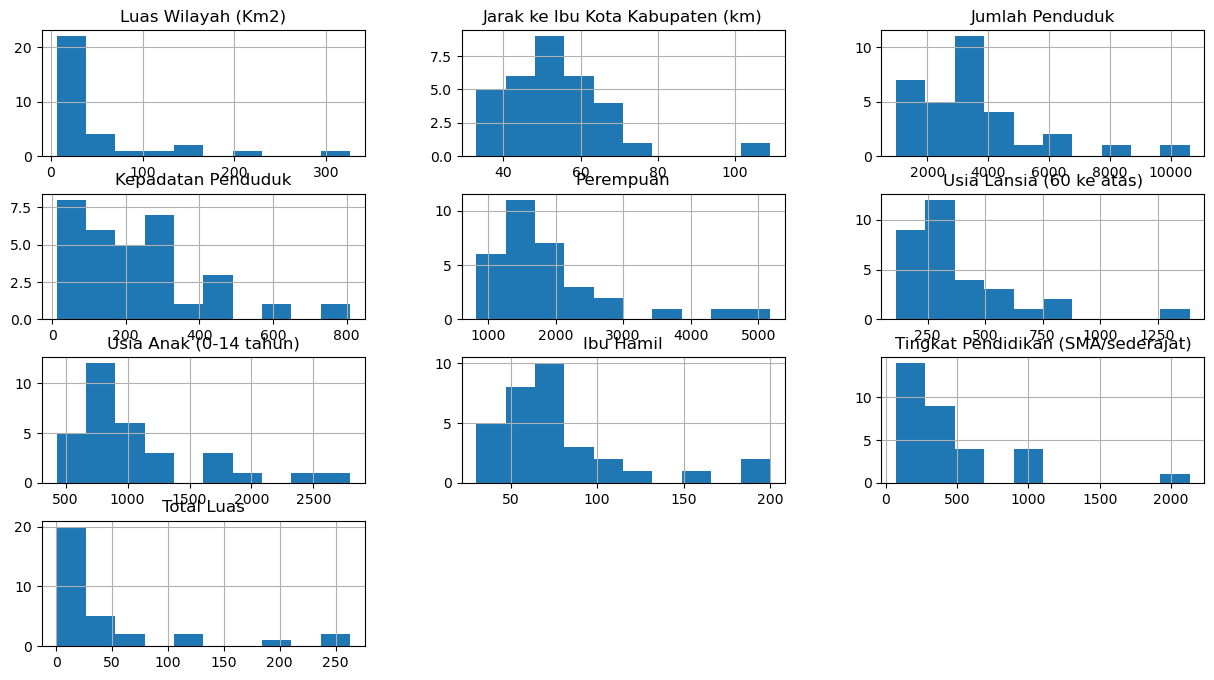

In [122]:
num_features.hist(figsize=(15,8))

In [123]:
num_features.skew()

Luas Wilayah (Km2)                    2.604752
Jarak ke Ibu Kota Kabupaten (km)      1.931120
Jumlah Penduduk                       1.732613
Kepadatan Penduduk                    1.263804
Perempuan                             1.990204
Usia Lansia (60 ke atas)              2.284582
Usia Anak (0-14 tahun)                1.666060
Ibu Hamil                             1.811442
Tingkat Pendidikan (SMA/sederajat)    2.596189
Total Luas                            2.275535
dtype: float64

Nilai skewness semua atribut memiliki distribusi **sangat condong ke kanan**, hal ini dikarenakan banyak data yang bernilai kontras. Untuk mengurangi kecondongan data, dilakukan **Logarithmic Transformation** untuk menstabilkan variansi dan mengurangi dampak outliers yang besar.

In [124]:
num_features['Jarak ke Ibu Kota Kabupaten (km)'] = np.log(num_features['Jarak ke Ibu Kota Kabupaten (km)'] + 1)
num_features['Jumlah Penduduk'] = np.log(num_features['Jumlah Penduduk'] + 1)
num_features['Kepadatan Penduduk'] = np.log(num_features['Kepadatan Penduduk'] + 1)
num_features['Perempuan'] = np.log(num_features['Perempuan'] + 1)
num_features['Usia Lansia (60 ke atas)'] = np.log(num_features['Usia Lansia (60 ke atas)'] + 1)
num_features['Usia Anak (0-14 tahun)'] = np.log(num_features['Usia Anak (0-14 tahun)'] + 1)
num_features['Ibu Hamil'] = np.log(num_features['Ibu Hamil'] + 1)
num_features['Tingkat Pendidikan (SMA/sederajat)'] = np.log(num_features['Tingkat Pendidikan (SMA/sederajat)'] + 1)
num_features['Total Luas'] = np.log(num_features['Total Luas'] + 1)

array([[<AxesSubplot:title={'center':'Luas Wilayah (Km2)'}>,
        <AxesSubplot:title={'center':'Jarak ke Ibu Kota Kabupaten (km)'}>,
        <AxesSubplot:title={'center':'Jumlah Penduduk'}>],
       [<AxesSubplot:title={'center':'Kepadatan Penduduk'}>,
        <AxesSubplot:title={'center':'Perempuan'}>,
        <AxesSubplot:title={'center':'Usia Lansia (60 ke atas)'}>],
       [<AxesSubplot:title={'center':'Usia Anak (0-14 tahun)'}>,
        <AxesSubplot:title={'center':'Ibu Hamil'}>,
        <AxesSubplot:title={'center':'Tingkat Pendidikan (SMA/sederajat)'}>],
       [<AxesSubplot:title={'center':'Total Luas'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

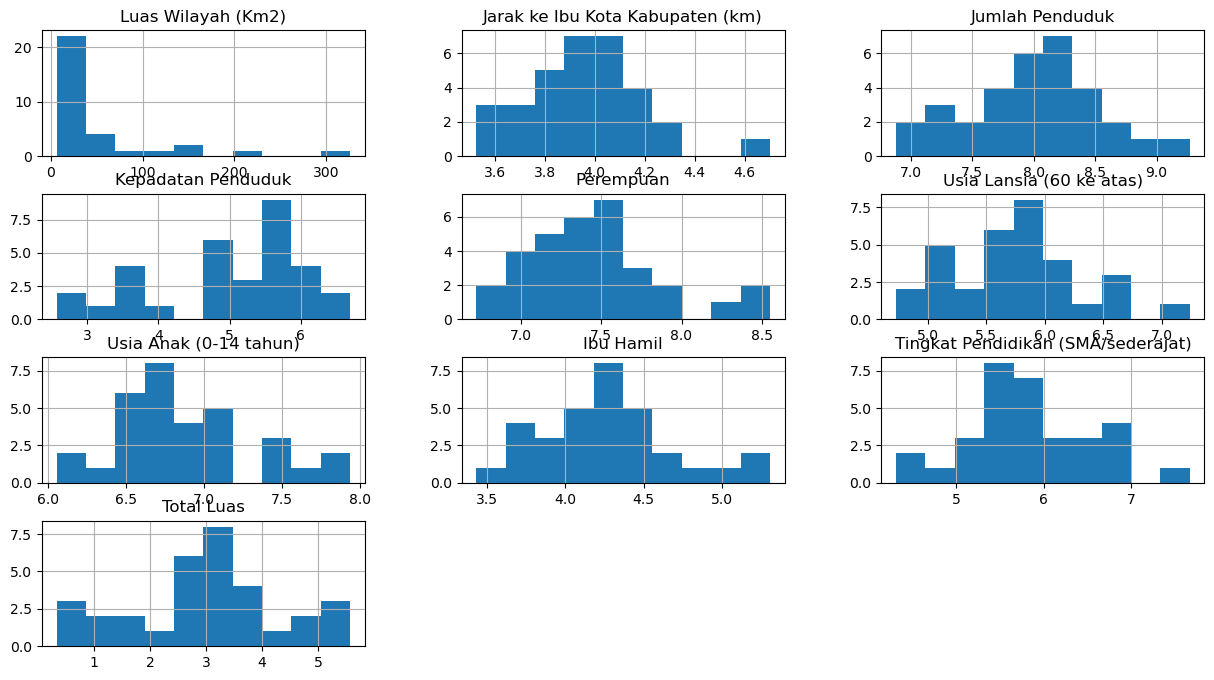

In [125]:
num_features.hist(figsize=(15,8))

In [126]:
num_features.skew()

Luas Wilayah (Km2)                    2.604752
Jarak ke Ibu Kota Kabupaten (km)      0.650569
Jumlah Penduduk                      -0.043994
Kepadatan Penduduk                   -0.766310
Perempuan                             0.889797
Usia Lansia (60 ke atas)              0.403792
Usia Anak (0-14 tahun)                0.596736
Ibu Hamil                             0.581067
Tingkat Pendidikan (SMA/sederajat)    0.322046
Total Luas                           -0.047088
dtype: float64

<AxesSubplot:>

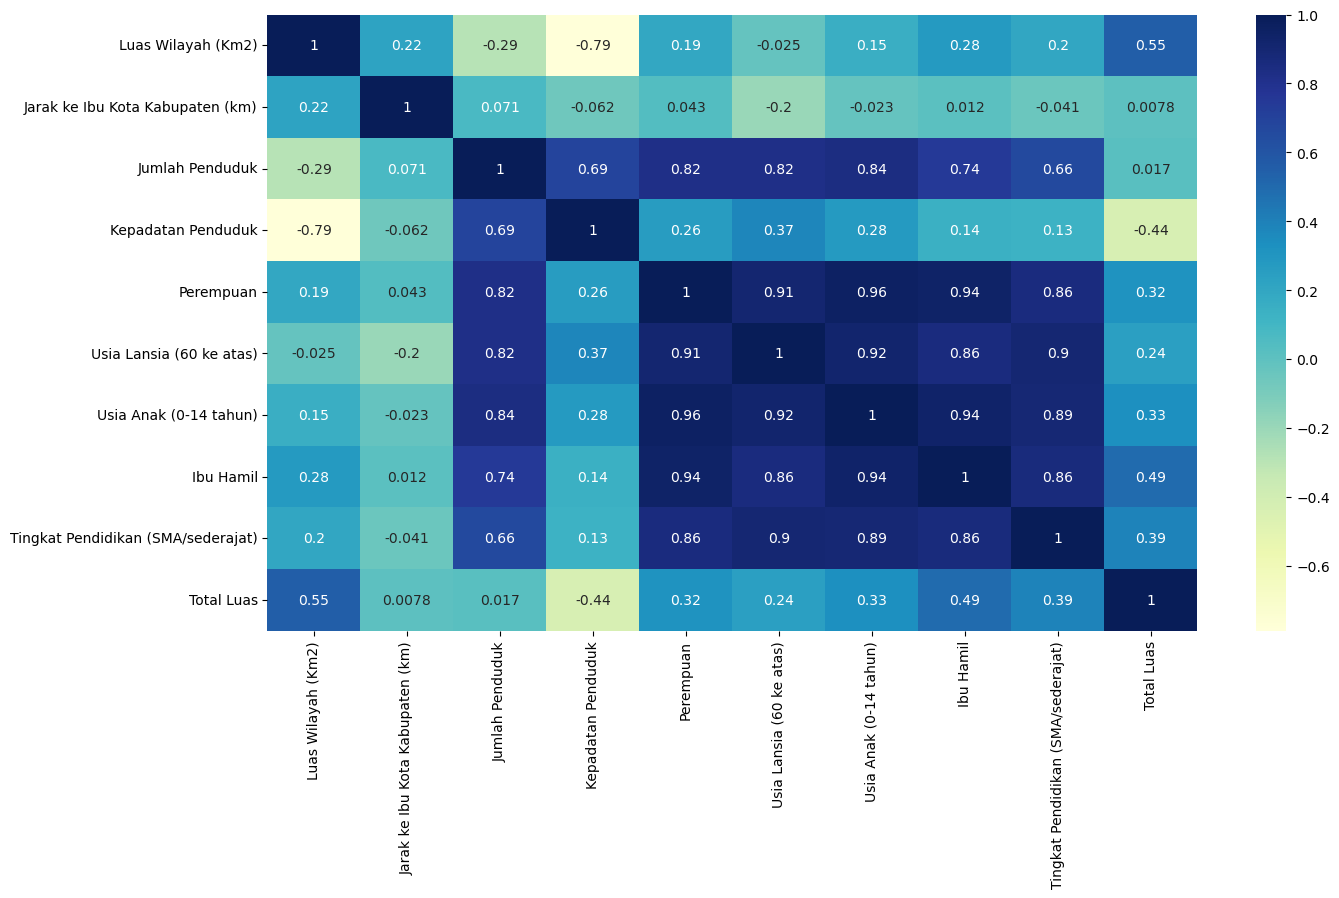

In [127]:
plt.figure(figsize=(15, 8))
sns.heatmap(num_features.corr(), annot=True, cmap="YlGnBu")

# Feature Engineering

Atribut `Ibu Hamil` dan `Perempuan` paling berdampak pada Total Luas.

In [128]:
num_features.head()

,Luas Wilayah (Km2),Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Total Luas
0,48.20,4.143135,8.676417,4.812184,7.962067,6.052089,7.412160,4.653960,5.926926,4.093010
1,18.05,4.060443,7.786552,4.897840,7.077498,5.153292,6.456770,3.806662,4.997212,2.587012
2,13.25,4.077537,8.133000,5.552960,7.416980,5.805135,6.719013,4.189655,5.556828,1.558145
3,14.35,4.007333,8.309431,5.648974,7.583248,5.799093,7.019297,4.317488,5.733341,1.000632
4,10.85,3.970292,8.027150,5.645447,7.311218,5.509388,6.722630,4.060443,5.416100,0.548121


In [129]:
num_features.dtypes

Luas Wilayah (Km2)                    float64
Jarak ke Ibu Kota Kabupaten (km)      float64
Jumlah Penduduk                       float64
Kepadatan Penduduk                    float64
Perempuan                             float64
Usia Lansia (60 ke atas)              float64
Usia Anak (0-14 tahun)                float64
Ibu Hamil                             float64
Tingkat Pendidikan (SMA/sederajat)    float64
Total Luas                            float64
dtype: object

In [130]:
num_features.shape

(32, 10)

<AxesSubplot:>

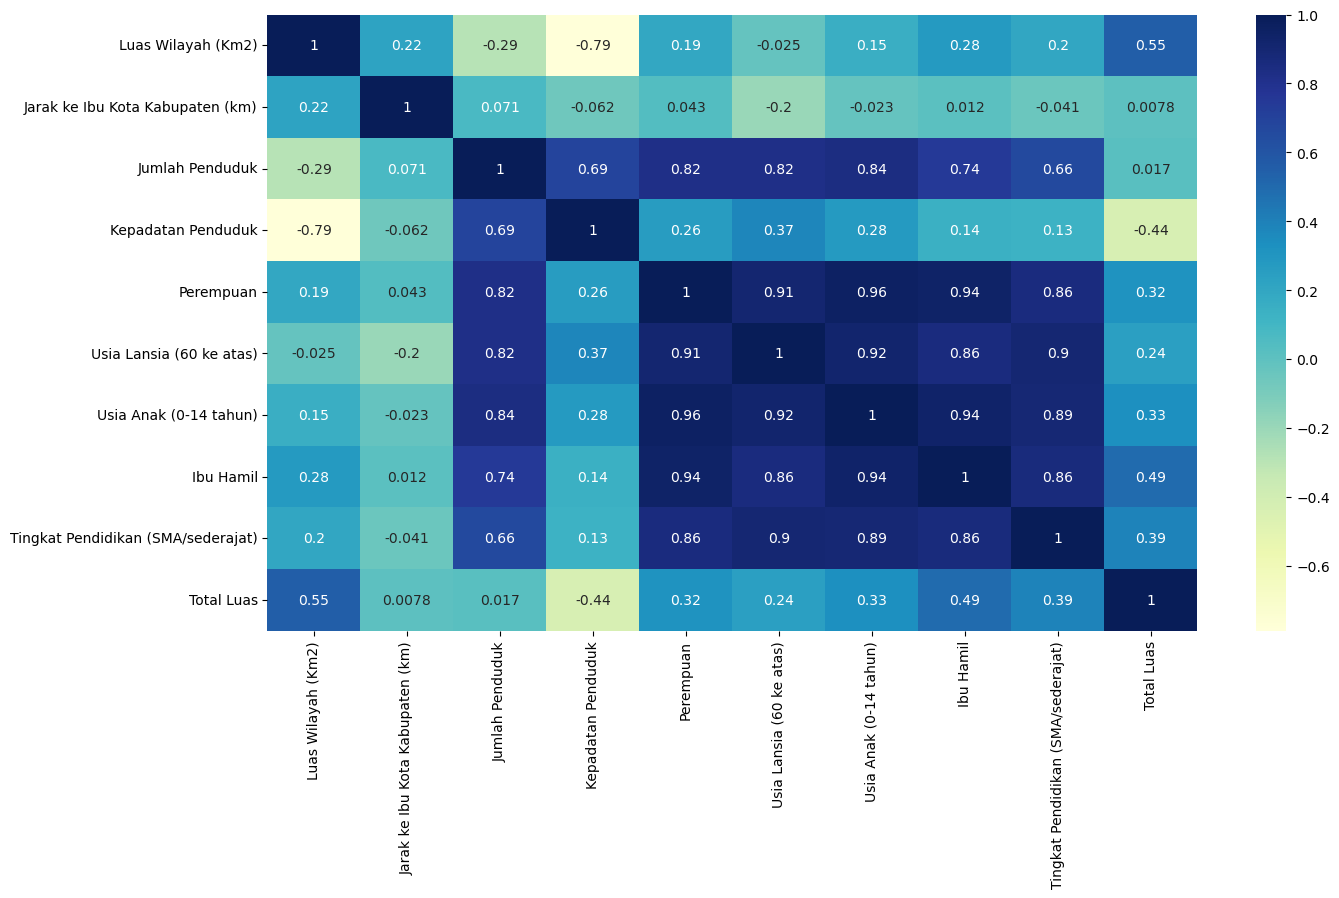

In [131]:
plt.figure(figsize=(15, 8))
sns.heatmap(num_features.corr(), annot=True, cmap="YlGnBu")

# Train Test Split

In [132]:
num_features.head()

,Luas Wilayah (Km2),Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Total Luas
0,48.20,4.143135,8.676417,4.812184,7.962067,6.052089,7.412160,4.653960,5.926926,4.093010
1,18.05,4.060443,7.786552,4.897840,7.077498,5.153292,6.456770,3.806662,4.997212,2.587012
2,13.25,4.077537,8.133000,5.552960,7.416980,5.805135,6.719013,4.189655,5.556828,1.558145
3,14.35,4.007333,8.309431,5.648974,7.583248,5.799093,7.019297,4.317488,5.733341,1.000632
4,10.85,3.970292,8.027150,5.645447,7.311218,5.509388,6.722630,4.060443,5.416100,0.548121


In [133]:
X = num_features.drop(['Total Luas'], axis =1)
y = num_features['Total Luas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Simple Linear Regression

In [134]:
model1 = LinearRegression()
scaler = StandardScaler()

X_train, y_train = num_features.drop(['Total Luas'], axis=1), num_features['Total Luas']
X_train_s = scaler.fit_transform(X_train)

model1.fit(X_train, y_train)

LinearRegression()

In [135]:
test_data = X_test.join(y_test)

test_data['Jarak ke Ibu Kota Kabupaten (km)'] = np.log(test_data['Jarak ke Ibu Kota Kabupaten (km)'] + 1)
test_data['Jumlah Penduduk'] = np.log(test_data['Jumlah Penduduk'] + 1)
test_data['Kepadatan Penduduk'] = np.log(test_data['Kepadatan Penduduk'] + 1)
test_data['Perempuan'] = np.log(test_data['Perempuan'] + 1)
test_data['Usia Lansia (60 ke atas)'] = np.log(test_data['Usia Lansia (60 ke atas)'] + 1)
test_data['Usia Anak (0-14 tahun)'] = np.log(test_data['Usia Anak (0-14 tahun)'] + 1)
test_data['Ibu Hamil'] = np.log(test_data['Ibu Hamil'] + 1)
test_data['Tingkat Pendidikan (SMA/sederajat)'] = np.log(test_data['Tingkat Pendidikan (SMA/sederajat)'] + 1)

X_test, y_test = test_data.drop(['Total Luas'], axis=1), test_data['Total Luas']

In [136]:
X_test_s = scaler.transform(X_test)

In [137]:
model1.score(X_test, y_test)

-110.9116229417635

In [138]:
model1.score(X_test_s, y_test)

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-1211.6965534006874

model1 without scaler score:
* -195.5633018781086

model with scaler score:
* -224171.47700573038:

## Random Forest

In [139]:
model2 = RandomForestRegressor()
model2.fit(X_train_s, y_train)

RandomForestRegressor()

In [140]:
model2.score(X_test, y_test)

c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


-5.362965580500261

In [141]:
model2.score(X_test_s, y_test)

-0.2839693396828904

## Grid Search with cross validation

In [142]:
param_grid = {
    "n_estimators": [50, 70, 100],
    "max_features": [8, 10, 12],
    "min_samples_split" : [2, 4, 6]
}

model3 = GridSearchCV(model2, param_grid, cv=5,
                      scoring="neg_root_mean_squared_error",
                      return_train_score=True)

model3.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 10, 12],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 70, 100]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [143]:
best_model = model3.best_estimator_

In [144]:
best_model.score(X_test_s, y_test)

-0.02671199163039195

## XGBoost wiht Cross Validation

In [145]:
regressor = xgb.XGBRegressor(eval_metric='rmsle')
par_grid = {
    "max_depth": [6, 10, 12],
    "n_estimators": [300, 500, 700],
    "learning_rate": [0.01, 0.015]
}
search = GridSearchCV(regressor, par_grid, cv=5).fit(X_train_s, y_train)
print(search.best_params_)

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300}


In [146]:
regressor = xgb.XGBRegressor(learning_rate = search.best_params_['learning_rate'],
                             n_estimators = search.best_params_['n_estimators'],
                             max_depth = search.best_params_['max_depth'],
                             eval_metric='rmsle')
regressor.fit(X_train_s, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [147]:
regressor.score(X_test, y_test)

-17.886802369991624

In [148]:
predictions = regressor.predict(X_train_s)

In [149]:
df = pd.DataFrame(predictions, columns=['Predictions'])
print(df)

    Predictions
0      3.892604
1      2.620881
2      1.699708
3      1.138311
4      0.810425
5      0.820295
6      1.721254
7      3.185766
8      3.103449
9      3.185766
10     1.489100
11     0.810425
12     4.749689
13     2.750184
14     2.827677
15     3.079774
16     3.478858
17     2.588897
18     2.536475
19     5.209663
20     3.090995
21     3.378670
22     3.680529
23     3.331631
24     3.640541
25     5.220455
26     3.080487
27     4.804866
28     4.680864
29     2.778792
30     3.776583
31     2.222527


In [150]:
solutions = num_features
y_true = solutions['Total Luas']
from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt(mean_squared_log_error(y_true, predictions))
print("The score is %.5f" % RMSLE)

The score is 0.07094


In [151]:
mse = mean_squared_error(y_true, predictions)
mae = mean_absolute_error(y_true, predictions)
r2 = r2_score(y_true, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - predictions)/y_true)) * 100

print('Evaluasi Model Extreme Gradient Boost')
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R: {rmse:.2f}")
print(f"Mean Absolute Precentage Error: {mape:.2f}%")

Evaluasi Model Extreme Gradient Boost
Mean Squared Error (MSE): 0.03
Mean Absolute Error (MAE): 0.13
Root Mean Squared Error (RMSE): 0.18
R: 0.18
Mean Absolute Precentage Error: 10.13%


# Save Model

In [154]:
import pickle

with open('luas.pkl', 'wb') as fileL:
    pickle.dump(regressor, fileL)

with open('luas.pkl', 'rb') as fileL:
    loaded_luas = pickle.load(fileL)

# Inferences

In [161]:
cols_when_model_builds = regressor.get_booster().feature_names
print(cols_when_model_builds)

None


In [162]:
print(loaded_luas.get_booster().feature_names)

None


In [157]:
input = {
    'Jarak ke Ibu Kota Kabupaten (km)': [62, 51, 49, 30.56],
    'Jumlah Penduduk' : [5862, 3476, 901, 1956],
    'Kepadatan Penduduk': [120, 133, 257, 280],
    'Perempuan': [2869, 1567, 457, 1870],
    'Usia Lansia (60 ke atas)': [424, 172, 331, 329],
    'Usia Anak (0-14 tahun)': [1655, 876, 472, 568],
    'Ibu Hamil':[104, 150, 78, 96],
    'Tingkat Pendidikan (SMA/sederajat)': [374, 472, 146, 389],
    'Luas Wilayah (Km2)': [4820, 1805.0, 1325.0, 1435.0]
}

X_new = pd.DataFrame(input)

In [158]:
loaded_luas.predict(X_new)

array([5.2096634, 5.2096634, 5.2096634, 5.2096634], dtype=float32)